# Artificial Neural Network (ANN) From Scratch 🧠

### Import Libraries ⬆️

In [164]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

### Read-In Data 📕

In [165]:
# Read in Data and Display First Few Rows
df = pd.read_csv("train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Split into Different Sets ⛓️‍💥

In [166]:
# Convert To Numpy Array for Math Operations
data = np.array(df)

"""
-- m = # of Rows, corresponding to examples.
-- n = # of Columns, correspoding to features.
"""
m, n = data.shape
np.random.shuffle(data)

# X & Y Train Sets
data_train = data[1000:m].T
X_train = data_train[1:n]
Y_train = data_train[0]
X_train = X_train / 255.
_,m_train = X_train.shape

### Initialize Parameters 🧮

In [167]:
# Randomly Initialize Paramters for the Model to Update
def initialize_parameters():
    """
    Randomly intialize parameters for the model to update.
    
    Parameters:
        None
    
    Returns:
        Weights and Biases Matrix for each layer
    """

    W_1 = np.random.rand(10, 784) - 0.5
    b_1 = np.random.rand(10, 1) - 0.5
    W_2 = np.random.rand(10, 10) - 0.5
    b_2 = np.random.rand(10, 1) - 0.5

    return W_1, b_1, W_2, b_2

### Define Activation & Required Functions 🔋

In [496]:
# Define ReLU (Rectified Linear Unit) Activation Function
def ReLU(Z):
    """
    Compute the ReLU for each element in the vector Z.
    
    Parameters:
        Z (numpy array)
    
    Returns:
        numpy array: ReLU activated values in the same shape as Z.
    """
    return np.maximum(Z, 0)

def one_hot(Y):
    """
    One-Hot Encode a Vector Y for backprop.
    
    Parameters:
        Y (Numpy Array)
    
    Returns:
        numpy array: Hot-encoded Y.
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    """
    Compute the derivative of the ReLU Activation Function for backprop.
    
    Parameters:
        Z (numpy array): Input array.
    
    Returns:
        numpy array: Computed ReLU Derivative Values (0 or Z)
    """
    return Z > 0

# Define Softmax Function (Converts Probs ==> Outputs)
def softmax(Z):
    """
    Compute the softmax for each element in the vector Z.
    
    Parameters:
        Z (numpy array): Input array.
    
    Returns:
        numpy array: Softmax probabilities of the same shape as Z.
    """
    return np.exp(Z) / sum(np.exp(Z))

### Define Forward & Backwards Propagation 🤖

In [169]:
# Define Forward Propagation (Model Makes Prediction)
def forward_prop(W_1, b_1, W_2, b_2, X):
    """
    Make predictions based on input data.
    
    Parameters:
        Weights (1 & 2), Biases (1 & 2), & Input Matrix X
    
    Returns:
        Z_1, A_1, Z_2, A_2
    """
    Z_1 = W_1.dot(X) + b_1
    A_1 = ReLU(Z_1)
    Z_2 = W_2.dot(A_1) + b_2
    A_2 = softmax(Z_2)

    return Z_1, A_1, Z_2, A_2

# Define Backwards Propagation (Model Updates Params)
def backward_prop(Z_1, A_1, Z_2, A_2, W_1, W_2, X, Y):
    """
    Finds source of error and computes errors.
    
    Parameters:
        Predictions, Weights, Training Data (X & Y)
    
    Returns:
        Updated Params: Z_1, A_1, Z_2, A_2, W_1, W_2, X, Y
    """
    one_hot_Y = one_hot(Y)
    dZ_2 = A_2 - one_hot_Y
    dW_2 = 1 / m * dZ_2.dot(A_1.T)
    db_2 = 1 / m * np.sum(dZ_2)
    dZ_1 = W_2.T.dot(dZ_2) * deriv_ReLU(Z_1)
    dW_1 = 1 / m * dZ_1.dot(X.T)
    db_1 = 1 / m * np.sum(dZ_1)
    return dW_1, db_1, dW_2, db_2

### Update Parameters 🔂

In [170]:
def update_params(W_1, b_1, W_2, b_2, dW_1, db_1, dW_2, db_2, lr):
    """
    Updates weights/biases for the model to learn.
    
    Parameters:
        Weights, Biases, Penalties, learning rate.
    
    Returns:
        Updated Params: W_1, b_1, W_2, b_2, dW_1, db_1, dW_2, db_2, lr
    """
    W_1 = W_1 - (lr * dW_1)
    b_1 = b_1 - (lr * db_1)
    W_2 = W_2 - (lr * dW_2)
    b_2 = b_2 - (lr * db_2)
    return W_1, b_1, W_2, b_2

def get_preds(A_2):
    return np.argmax(A_2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, lr):
    W_1, b_1, W_2, b_2 = initialize_parameters()
    for i in tqdm(range(iterations)):
        Z_1, A_1, Z_2, A_2 = forward_prop(W_1, b_1, W_2, b_2, X)
        dW_1, db_1, dW_2, db_2 = backward_prop(Z_1, A_1, Z_2, A_2, W_1, W_2, X, Y)
        W_1, b_1, W_2, b_2 = update_params(W_1, b_1, W_2, b_2, dW_1, db_1, dW_2, db_2, lr)
        
    print("Accuracy: ", get_accuracy(get_preds(A_2), Y))
    return W_1, b_1, W_2, b_2

In [251]:
W_1, b_1, W_2, b_2 = gradient_descent(X_train, Y_train, 20000, 0.1)

  0%|          | 0/20000 [00:00<?, ?it/s]

100%|██████████| 20000/20000 [21:50<00:00, 15.26it/s]

Accuracy:  0.9490487804878048


In [252]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_preds(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


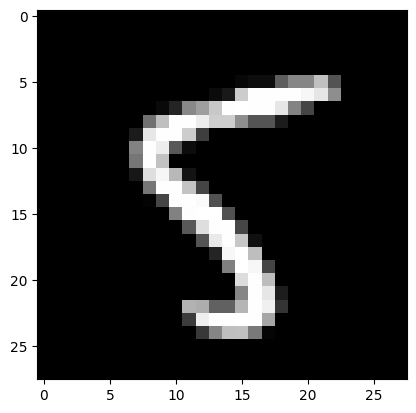

In [495]:
r = round(np.random.rand() * 100)
test_prediction(r, W_1, b_1, W_2, b_2)